## Practical 3 practice 
## Image Enhancement in Spatial Domain
### 3A. Basic Intensity Transformations on Images using Python 


**1. Linear (negative transformations)**

In [1]:
import cv2 
import matplotlib.pyplot as plt

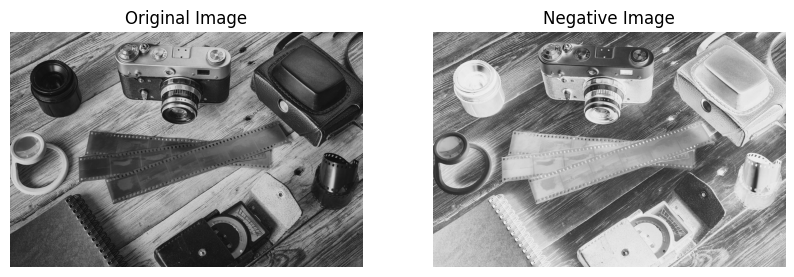

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread("lena.jpg")

# Check if image is loaded
if original_image is None:
    print("Error: Image not found")
    exit()

# Negative transformation
negative_image = 255 - original_image

# Display images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Negative Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(negative_image, cv2.COLOR_BGR2RGB))
plt.title("Negative Image")
plt.axis("off")

plt.show()

**2. Log Transformation (Logarithm Function)&Inverse-Log Transformation (Exponential Function)**

## Theory Explanation 
### 🔹 Log Transformation (Spatial Domain Enhancement)
   **Formula: s=c⋅log(1+r)**
   
   **Purpose:**
    (i)Enhances dark regions
    (ii)Compresses bright regions
    (iii)Useful when image details are hidden in low intensities

### 🔹 Inverse-Log Transformation (Exponential Function)
   **Formula: r=(e^s/c)-1**
   
   **Purpose:**
     (i)Reverses log transformation
     (ii)Restores original brightness distribution

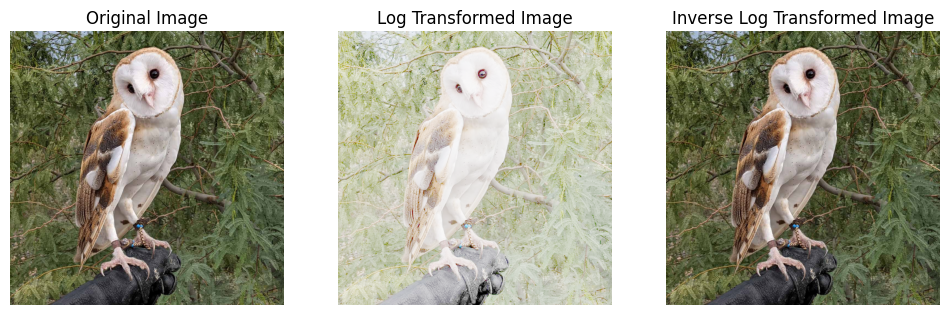

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load color image (USE CORRECT NAME / PATH)
image = cv2.imread('owl.jpg')  # change path if needed

# Check image
if image is None:
    print("Error: Image not found. Check filename or path.")
    exit()

# Convert to float
image_float = np.float32(image)

# -------- LOG TRANSFORMATION --------
c = 45
log_transformed = c * np.log(1 + image_float)
log_transformed = np.uint8(log_transformed)

# -------- INVERSE LOG TRANSFORMATION --------
inverse_log_transformed = np.exp(log_transformed / c) - 1
inverse_log_transformed = np.uint8(inverse_log_transformed)

# Convert BGR → RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
log_rgb = cv2.cvtColor(log_transformed, cv2.COLOR_BGR2RGB)
inverse_log_rgb = cv2.cvtColor(inverse_log_transformed, cv2.COLOR_BGR2RGB)

# -------- DISPLAY --------
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(log_rgb)
plt.title("Log Transformed Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(inverse_log_rgb)
plt.title("Inverse Log Transformed Image")
plt.axis('off')

plt.show()

**3. Power-Law (Gamma) Transformation**

Power-law (gamma) transformations can be mathematically expressed as  **s=(cr)^γ**.
Gamma correction is important for displaying images on a screen correctly, to prevent bleaching or darkening of images when 
viewed from different types of monitors with different display settings.
This is done because our eyes perceive images in a gamma-shaped curve, whereas cameras capture images in a linear fashion. 

In [5]:
## Below is the Python code to apply gamma correction.
import cv2
import numpy as np

# Open the image.
img = cv2.imread('owl.jpg')

# Trying 4 gamma values.
for gamma in [0.1, 0.5, 1.2, 2.2]:
    
    # Apply gamma correction.
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')

    # Save edited images.
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)

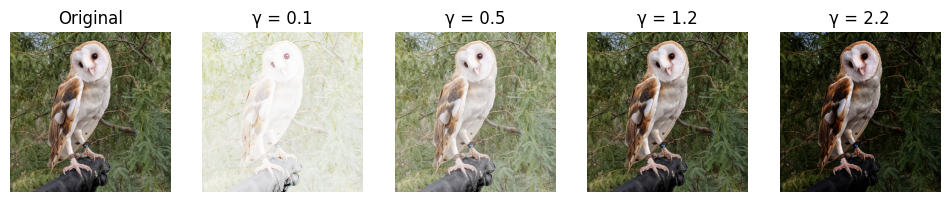

In [4]:
# Load image
img = cv2.imread('owl.jpg')

# Convert to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Normalize
img_float = img / 255.0

gammas = [0.1, 0.5, 1.2, 2.2]

plt.figure(figsize=(12, 6))

# Show original
plt.subplot(1, 5, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')
#Image Enhancement in Spatial Domain
# Apply and display gamma corrections
for i, gamma in enumerate(gammas):
    gamma_corrected = np.power(img_float, gamma)
    gamma_corrected = np.uint8(gamma_corrected * 255)

    # Save image
    cv2.imwrite(f'gamma_transformed_{gamma}.jpg', gamma_corrected)

    # Convert for display
    gamma_rgb = cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB)

    # Display
    plt.subplot(1, 5, i + 2)
    plt.imshow(gamma_rgb)
    plt.title(f"γ = {gamma}")
    plt.axis('off')

plt.show()

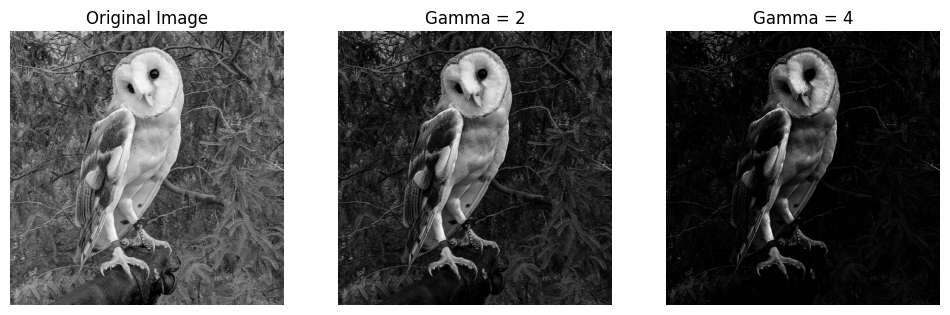

In [6]:
# Load image (update path/filename!)
image = cv2.imread('owl.jpg', cv2.IMREAD_GRAYSCALE)

#Image Enhancement in Spatial Domain
# Apply gamma correction
gamma = 2
gamma2 = 4

adjusted_image = np.power(image / 255.0, gamma) * 255.0
adjusted_image = adjusted_image.astype(np.uint8)

adjusted_image2 = np.power(image / 255.0, gamma2) * 255.0
adjusted_image2 = adjusted_image2.astype(np.uint8)

# Display
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(adjusted_image, cmap='gray')
plt.title("Gamma = 2")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(adjusted_image2, cmap='gray')
plt.title("Gamma = 4")
plt.axis('off')

plt.show()

**4. Contrast Stretching**
 
 Key points:
  (i) np.vectorize works, but it’s slow for big images.
  
  (ii) Ensure image is loaded before processing.
  
  (iii) Convert final result to uint8 before displaying or saving.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to map intensity levels
def pixelVal(pix, r1, s1, r2, s2):
    if 0 <= pix <= r1:
        return (s1 / r1) * pix
    elif r1 < pix <= r2:
        return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2) / (255 - r2)) * (pix - r2) + s2
# Load the image
img = cv2.imread('doggo.jpg')  # Replace with your image path
if img is None:
    print("❌ Error: Image not found")
    exit()

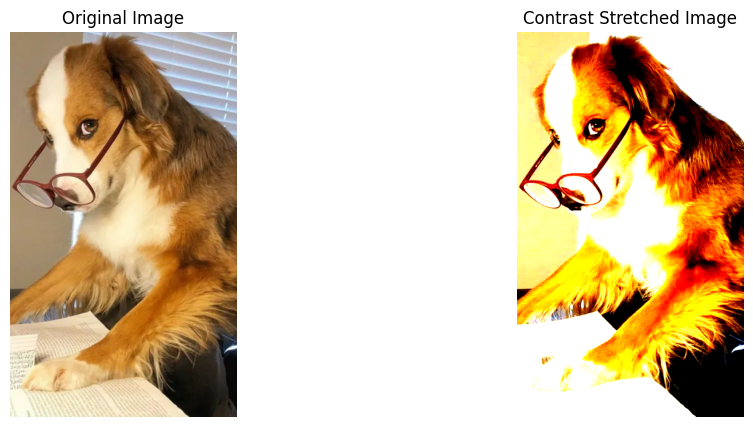

In [2]:
# Define parameters
r1, s1 = 70, 0
r2, s2 = 140, 255

# Vectorize the function
pixelVal_vec = np.vectorize(pixelVal)

# Apply contrast stretching
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2).astype(np.uint8)

# Save edited image
cv2.imwrite('contrast_stretch.jpg', contrast_stretched)

# Display images
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contrast_stretched, cv2.COLOR_BGR2RGB))
plt.title("Contrast Stretched Image")
plt.axis('off')

plt.show()

️**5. Thresholding**

Key points:
  
  (i) Load image in grayscale
  
  (ii) Use cv2.threshold to create binary image
  
  (iii) Always check if image is loaded

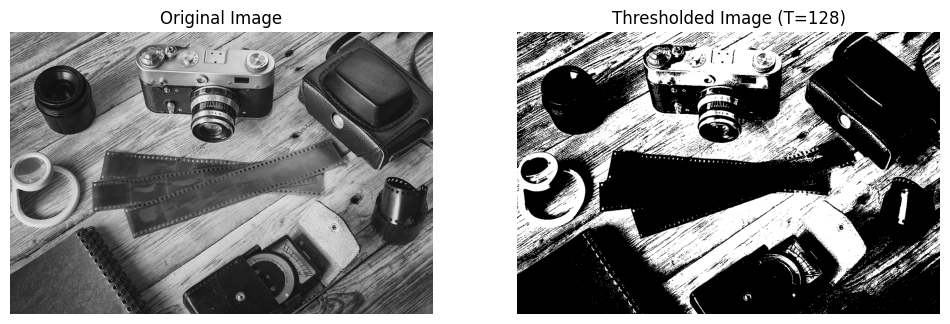

In [4]:
""" Applies thresholding to an image and displays the results.
    Args: 
            image_path: The path to the input image. 
            threshold_value: The threshold value to use. """
def threshold_image(image_path, threshold_value):
    # Load grayscale image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("❌ Error: Image not found")
        return
    
    # Apply thresholding
    ret, thresholded_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

    # Display
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thresholded_img, cmap='gray')
    plt.title(f"Thresholded Image (T={threshold_value})")
    plt.axis('off')

    plt.show()

# Example usage
threshold_image("lena.jpg", 128)  # Replace with your image path

**5.Intensity Level Slicing-**:🧠 Key Points

Intensity Level Slicing enhances a specific intensity range.

Pixels within the chosen range → white (255)

Pixels outside → black (0)

Common in medical imaging to highlight structures.

Use grayscale for single-channel images for simpler processing.

1.without BG

2. With BG

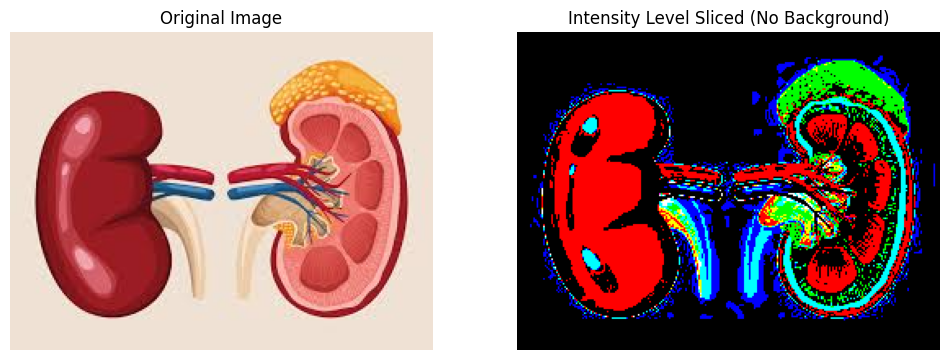

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('kidney.webp')  # Color image
if img is None:
    print("❌ Error: Image not found")
    exit()

# Convert BGR → RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Copy original image
transformed_rgb = img_rgb.copy()

# Intensity level slicing (without background)
# For each channel: if 140 < val < 210 → 255, else → 0
mask = (img_rgb > 140) & (img_rgb < 210)
transformed_rgb[mask] = 255
transformed_rgb[~mask] = 0

# Display
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_rgb)
plt.title("Intensity Level Sliced (No Background)")
plt.axis('off')

plt.show()

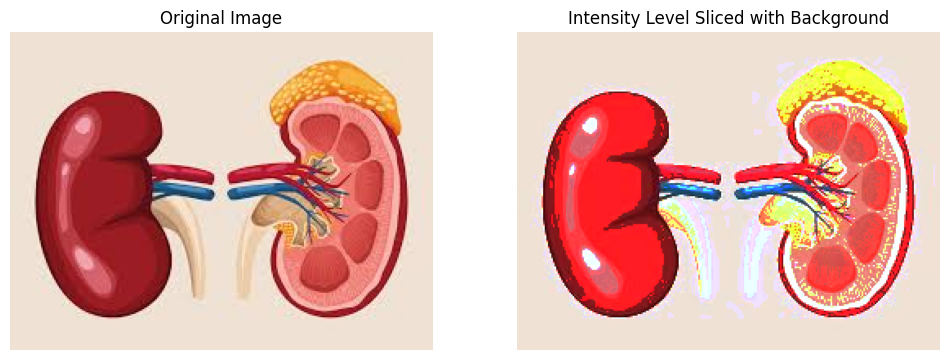

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('kidney.webp')
if img is None:
    print("❌ Error: Image not found. Check filename/path.")
    exit()

# --- Intensity level slicing with background preservation ---
# For color images, apply per channel
lower = 140
upper = 210

# Copy original image
transformed_image = img.copy()

# Create a mask of pixels in the intensity range (per channel)
mask = (img > lower) & (img < upper)

# Set selected pixels to 255
transformed_image[mask] = 255

# Convert to uint8 just in case
transformed_image = transformed_image.astype(np.uint8)

# --- Display ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title("Intensity Level Sliced with Background")
plt.axis('off')

plt.show()

**6. Bit plane Slicing**
Key Points About Bit-Plane Slicing

Each 8-bit grayscale image has 8 bits per pixel.

Bit-plane slicing extracts each bit across all pixels:

Bit 0 → least significant bit (LSB) → fine details / noise

Bit 7 → most significant bit (MSB) → overall image structure

Visualization multiplies bit values by 255 to show them clearly.

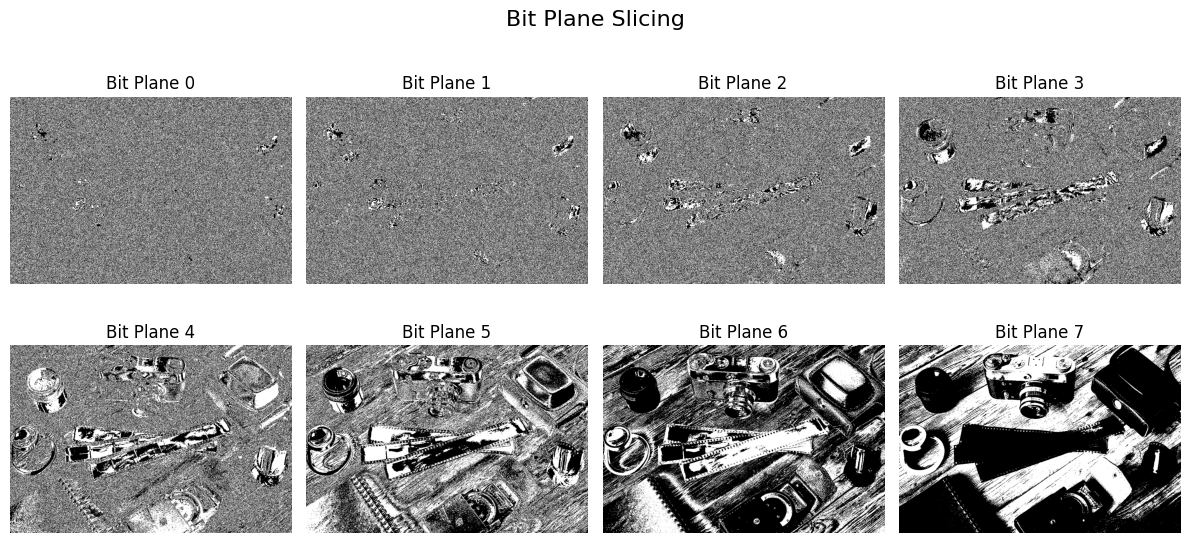

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bit_plane_slicing(image_path):
    """
    Performs bit-plane slicing on a grayscale image and displays the 8 bit planes.
    
    Args:
        image_path: Path to the input image.
    """
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("❌ Error: Image not found")
        return
    
    # Number of rows and columns for subplots
    num_rows = 2
    num_cols = 4

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
    fig.suptitle("Bit Plane Slicing", fontsize=16)

    # Iterate through each bit plane
    for i in range(8):
        # Extract bit plane i
        bit_plane = (img >> i) & 1
        
        # Multiply by 255 to display as image
        bit_plane_display = bit_plane * 255

        # Determine subplot location
        row_index = i // num_cols
        col_index = i % num_cols

        axes[row_index, col_index].imshow(bit_plane_display, cmap='gray')
        axes[row_index, col_index].set_title(f"Bit Plane {i}")
        axes[row_index, col_index].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
bit_plane_slicing("lena.jpg")  # Replace with your image path